In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imutils
import pickle

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [15]:
%cd '/content/gdrive/My Drive/computer vision project2'
!ls

/content/gdrive/My Drive/computer vision project2
'cropped images'   video.mp4


In [0]:
parkng_layout = open("parking_map.pickle","rb")
parking_spot_with_id = pickle.load(parkng_layout)

In [0]:
def show_images(images, cmap=None):
    cols = 20
    rows = 10
    
    plt.figure(figsize=(15, 12))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

In [0]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(15, 12))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

In [0]:
frame_indexes = [0,151,340,414,484,503,641,677,705,953,995,
                 1096,1123,1247,1321,1378,1451,1558,1585,1664,1766,1808.1872,2020,2229,2377,2443,
                 2553,2615,2670,2780,2865,2898,2961,3065,3188,3322,3494,3553]

frame_indexes = [0,151,340,953,995,
                 1096,1123,1378,1451,1585,1664,2443,
                 2553,3065,3188,3322,3494,3553]
# frame_indexes = [0]

In [7]:
len(frame_indexes)

38

In [0]:
cropped_lots_images = []
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('video.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
frame_index = -1
while(cap.isOpened()):
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        frame_index += 1
        if frame_index in frame_indexes:

            frame_resized = imutils.resize(frame, width=1188)

            for key,lots in parking_spot_with_id[0].items():
                for index, (parking_id,parking_rect) in enumerate(lots.items()):

                    crop_img = frame_resized[parking_rect[1]:parking_rect[3] +1, parking_rect[0]:parking_rect[2] + 1]
                    # cv2.rectangle(frame_resized, (parking_rect[0],parking_rect[1]),(parking_rect[2],parking_rect[3]),(0,255,0),2)
                    cropped_lots_images.append(crop_img)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        
    # Break the loop
    else: 
        break
# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [22]:
type(cropped_lots_images[0:20])

list

In [90]:
len(cropped_lots_images)

2592

In [121]:
cropped_lots_images[5].shape, cropped_lots_images[112].shape

((0, 33, 3), (61, 33, 3))

In [0]:
show_images([cv2.Canny(cv2.cvtColor(cropped_lots_images[112], cv2.COLOR_RGB2GRAY), 100, 200)], cmap=None)

In [0]:
final_imgs = []
for img in cropped_lots_images:
    if img.shape[0] >= 61:
        final_imgs.append(img)

In [23]:
len(final_imgs)

2160

In [0]:
i = 0

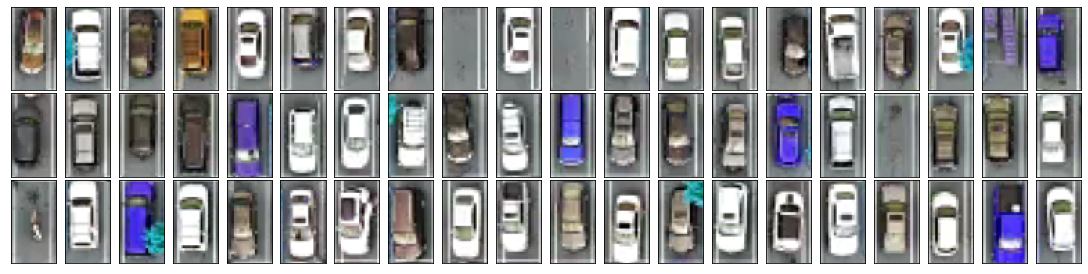

In [21]:
show_images(final_imgs[i:i+60], cmap=None)

In [0]:
import statistics 

In [0]:
arr = [np.sum(x[0:,0:,0:]) for x in cropped_lots_images]

In [94]:
arr.index(max(arr))

1073

In [0]:
for index, img in enumerate(final_imgs):
    cv2.imwrite(f"./cropped images/img-{index}.png", img)

In [0]:
  def show_images(self,cols = 1):
      #https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
      """Display a list of images in a single figure with matplotlib.
        
      Parameters
      ---------
      images: List of np.arrays compatible with plt.imshow.
        
      cols (Default = 1): Number of columns in figure (number of rows is 
                          set to np.ceil(n_images/float(cols))).
        
      titles: List of titles corresponding to each image. Must have
              the same length as titles.
      """

      images, titles = self.all_images, self.all_titles

      assert((titles is None)or (len(images) == len(titles)))
      n_images = len(images)
      if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
      fig = plt.figure()
      for n, (image, title) in enumerate(zip(images, titles)):
          a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)

          try:
              if image.ndim == 2:
                  plt.gray()
                  pass
            
          except:
              pass
          plt.imshow(image)
          a.set_title(title)
            
      fig.set_size_inches(np.array(fig.get_size_inches()) * n_images + 1000)
      plt.show()

In [0]:
# cropped_lots = {}
# # Create a VideoCapture object and read from input file
# # If the input is the camera, pass 0 instead of the video file name
# cap = cv2.VideoCapture('video.mp4')

# # Check if camera opened successfully
# if (cap.isOpened()== False): 
#   print("Error opening video stream or file")

# # Read until video is completed
# frame_index = 0
# while(cap.isOpened()):
#   # Capture frame-by-frame
#     ret, frame = cap.read()
#     if ret == True:

#         if frame_index in frame_indexes:
#             # Display the resulting frame
#             # cv2.imshow('Frame',frame)
#             # crop_img = frame[100:150, 200:560]
#             # show_images([crop_img], cmap=None)
#             frame = imutils.resize(frame, width=1188)
#             masked_frame = cv2.cvtColor(select_rgb_white_yellow(frame), cv2.COLOR_RGB2GRAY)
#             for key,lots in parking_spot_with_id[0].items():
#                 for index, (parking_id,parking_rect) in enumerate(lots.items()):
#                     crop_img = frame[parking_rect[1]:parking_rect[3] + 1, parking_rect[0]:parking_rect[2] + 1]
#                     masked_crop_img = frame[parking_rect[1]:parking_rect[3] + 1, parking_rect[0]:parking_rect[2] + 1]
#                     img_sum = np.sum(masked_crop_img)
#                     # show_images([crop_img], cmap=None)
#                     if parking_id in cropped_lots:
#                         # print("APPENDING MORE")
#                         if not (img_sum in cropped_lots[parking_id]["sum"]):
#                             cropped_lots[parking_id]["sum"].append(img_sum)
#                             cropped_lots[parking_id]["image"].append(masked_crop_img)
#                     else:
#                         # print("CREATING NEW")
#                         obj = {
#                             "sum": [img_sum],
#                             "image": [masked_crop_img]
#                         }
#                         cropped_lots[parking_id] = obj              
#                 #     break
#                 # break
#             # break
#             # show_images([crop_img], cmap=None)
#             # Press Q on keyboard to  exit
#             if cv2.waitKey(25) & 0xFF == ord('q'):
#                 break
#         frame_index += 1
#     # Break the loop
#     else: 
#         break
# # When everything done, release the video capture object
# cap.release()

# # Closes all the frames
# cv2.destroyAllWindows()

In [0]:
import pickle
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import activations
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import *
from keras.layers.pooling import *
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import GaussianNoise

In [82]:
model = Sequential([
    # Flatten(input_shape=(61, 33, 3)),
    Conv2D(64, kernel_size=(3, 3), input_shape=(61, 33, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(100, activation='sigmoid'),
    Dense(60, activation='sigmoid'),
    # Dropout(0.2),
    Dense(50, activation='sigmoid'),
    # Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 61, 33, 64)        1792      
_________________________________________________________________
flatten_16 (Flatten)         (None, 128832)            0         
_________________________________________________________________
dense_57 (Dense)             (None, 100)               12883300  
_________________________________________________________________
dense_58 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_59 (Dense)             (None, 50)                3050      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 51        
Total params: 12,894,253
Trainable params: 12,894,253
Non-trainable params: 0
_________________________________________

In [0]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [0]:
targets = np.genfromtxt('./labels.csv', delimiter=',')

In [0]:
callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=5),
             ModelCheckpoint(filepath=f'model{5}.h5', monitor='val_loss', mode='min', save_best_only=True)]
histories = model.fit(np.array(final_imgs[0:len(final_imgs)-1]), targets, batch_size=10, callbacks=callbacks, validation_split=0.3, verbose=1, shuffle=True, epochs=1000)